## What Is a Dataset?

A dataset is a collection of data points with a common schema. The Cortex Python SDK provides transformations and visualizations to facilitate data cleaning, feature identification and feature construction. In this notebook we demonstrate how to build a dataset and how to view the contents of datasets.

## How is a Dataset Built? 
First, import the Cortex library and instantiate a builder.

In [1]:
from cortex import Cortex
import numpy as np
import pandas as pd
import matplotlib as mb

builder = Cortex.client().builder()


Builder is the top level factory object in the Cortext Python SDK. The builder returns a factory object that is customized to handle the context for the particular class it builds. A dataset requires a collection of data to be useful, so the factory object returns a dataset builder that can take data in a number of different forms.

For example, you can associate a CSV file with a dataset:

In [2]:
csv_data_set_builder = builder.dataset('test/ds01<add your initials>')

csv_example_data_set = csv_data_set_builder.from_csv('./data/sample.csv').build()

file version not found, pushing to remote storage: /cortex/datasets/test/ds01luke/ff20eb6529f47b404d81b13e7c3849ef.csv


Or a dataset with JSON:

In [3]:
json_data_set_builder = builder.dataset('test/ds02<add your initials>')

json_example_data_set = json_data_set_builder.from_json('./data/sample.json').build()

file version not found, pushing to remote storage: /cortex/datasets/test/ds02luke/8d7784a515dbf13093043d2492fa3c64.json


Or from a pandas DataFrame:

In [4]:
# two columns of random numbers, indexed a through e
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
q = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

# make a data frame by composing the columns together and labeling them
pdf = pd.DataFrame({'c1':s,'c2':q})

pd_data_set_builder = builder.dataset('test/ds03<add your initials>')

data_frame_data_set = pd_data_set_builder.from_df(pdf).build()

file version not found, pushing to remote storage: /cortex/datasets/test/ds03/823be78f3667c8d70ed86a7bf21fee33.json


In [30]:
data_frame_data_set.as_pandas()

,c1,c2
0,1.643853,-0.148309
1,0.661985,-0.382597
2,-0.080497,0.404289
3,0.782708,0.032629
4,-0.819134,-0.420176


You can also set the title and description of your dataset:

In [5]:
csv_example_data_set.title = 'A Title for the example <add your initials>'
csv_example_data_set.description = 'A somewhat longer piece of text that describes the purpose of the dataset.'

Once constructed, the dataset can be explicitly persisted.

In [6]:
csv_example_data_set.save()

Note that with the `Cortex.local()` client, the dataset is persisted to the local disk. When using the Cortex client `Cortex.client()`, the dataset is persisted in Cortex.

## Dataset Feature Construction

Datasets help in feature construction through the use of pipelines. Pipelines allow functions to be chained together to modify and combine columns to create and clarify new features in the dataset. To find out how to create and persist pipelines, see [Pipeline](https://docs.cortex.insights.ai/docs/cortex-python-sdk-guide/pipeline/).

## View Datasets

Datasets can be viewed in tables or through visualizations. 

### Data Dictionary
A Dataset can generate a data dictionary:

In [31]:
csv_example_data_set.data_dictionary()

,Attribute,Type,% Nulls,Count,Unique,Observations
0,a,object,0.1,10,10,Sample: 0.25914 | 0.93124 | 0.58965
1,b,object,0.0,10,10,Sample: 0.83726 | 0.85583 | 0.9273
2,c,object,0.0,10,2,Sample: 0 | 1
3,d,object,0.1,10,10,Sample: 0.10951 | 0.7914100000000001 | 0.20392000000000002
4,e,object,0.0,10,10,Sample: 65298 | 15238 | 50729


### pandas DataFrame

Datasets can also generate pandas DataFrames. 

In [32]:
jdf = json_example_data_set.as_pandas()

pandas' DataFrames include several different methods for [viewing data](https://pandas.pydata.org/pandas-docs/stable/10min.html#viewing-data) .

In [34]:
jdf.head()

,age,country,females,males,total,year
0,0,United States,1966000,2054000,4019000,2010
1,1,United States,1973000,2056000,4030000,2010
2,2,United States,1979000,2059000,4038000,2010
3,3,United States,1983000,2061000,4043000,2010
4,4,United States,1985000,2063000,4048000,2010


### With Visualizations 

Here are the built-in visualizations that you get with datasets. Visualizations require a dataframe. Most commonly the dataframe is constructed by running a pipeline on the data set: 

In [63]:
clean_csv_pl.reset()

In [64]:
clean_csv_pl = csv_example_data_set.pipeline('clean_csv_pl')

def add_new_column(pipeline, df):
    x = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
    y = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
    z = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
    pdf = pd.DataFrame({'c1':x, 'c2':y,'c3':z})
    return pdf

In [65]:
clean_csv_pl.add_step(add_new_column)

In [66]:
cleaned_csv_df = clean_csv_pl.run(csv_example_data_set.as_pandas())

cleaned_csv_df.describe()

running pipeline [clean_csv_pl]:
> add_new_column 


,c1,c2,c3
count,5.000000,5.000000,5.000000
mean,-0.166738,0.242055,0.268190
std,0.757363,0.659187,0.673456
min,-1.443027,-0.573943,-0.608079
25%,-0.259359,-0.129327,0.175726
50%,0.171679,0.081537,0.230826
75%,0.272941,0.907383,0.256328
max,0.424075,0.924626,1.286148


In [67]:
#v = csv_example_data_set.visuals(cleaned_csv_df)
v = csv_example_data_set.visuals(cleaned_csv_df)


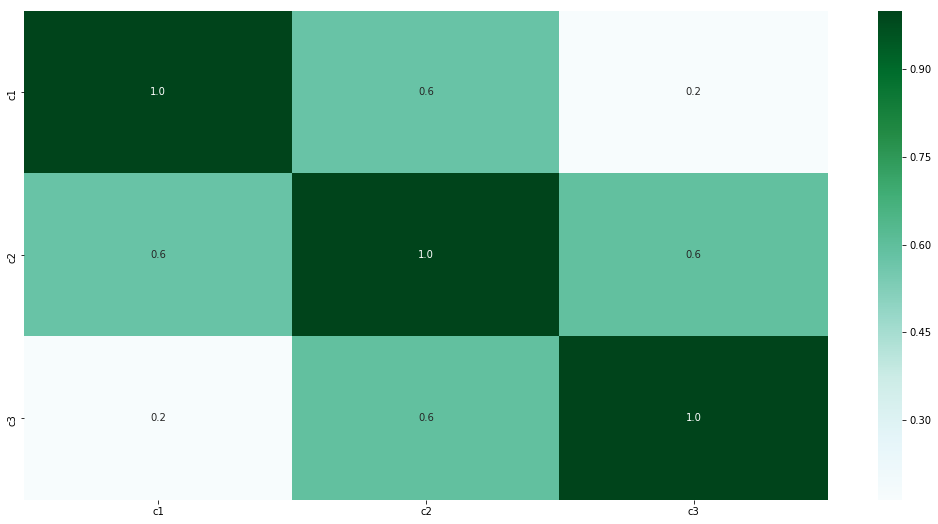

<Figure size 1296x648 with 0 Axes>

In [68]:
v.show_corr_heatmap()

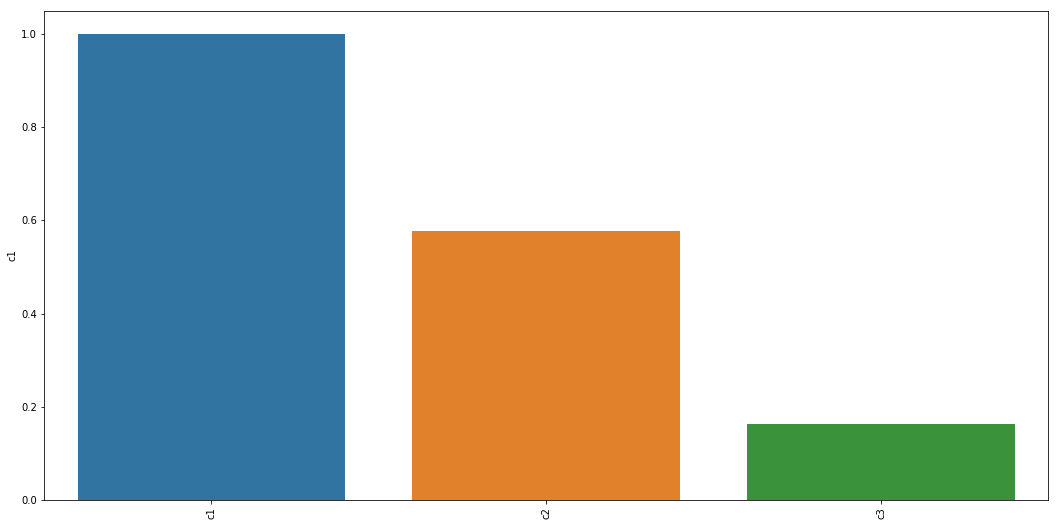

<Figure size 1296x648 with 0 Axes>

In [70]:
v.show_corr('c1')

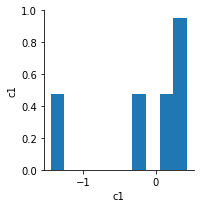

<Figure size 1296x648 with 0 Axes>

In [71]:
v.show_corr_pairs('c1')

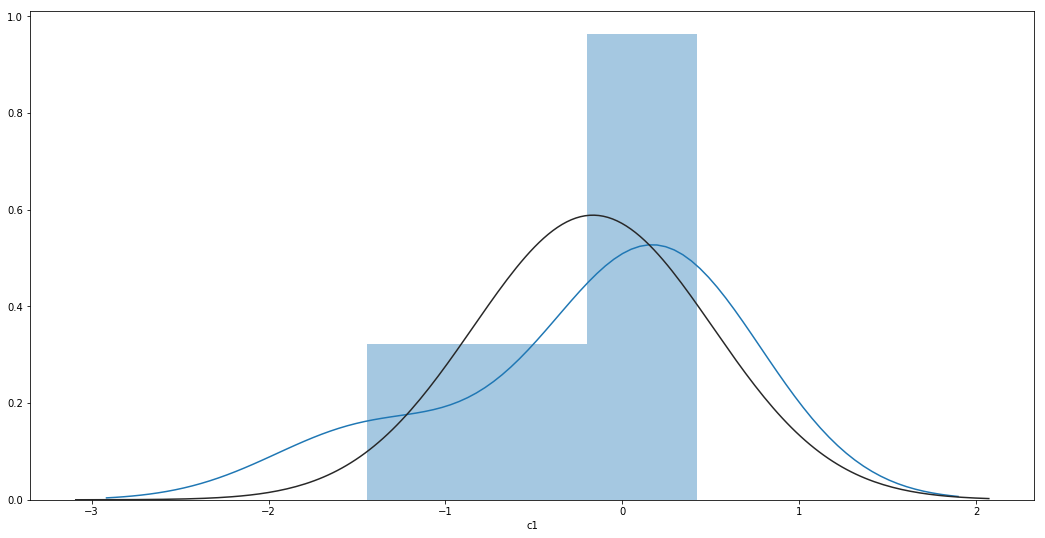

<Figure size 1296x648 with 0 Axes>

In [72]:
v.show_dist('c1')

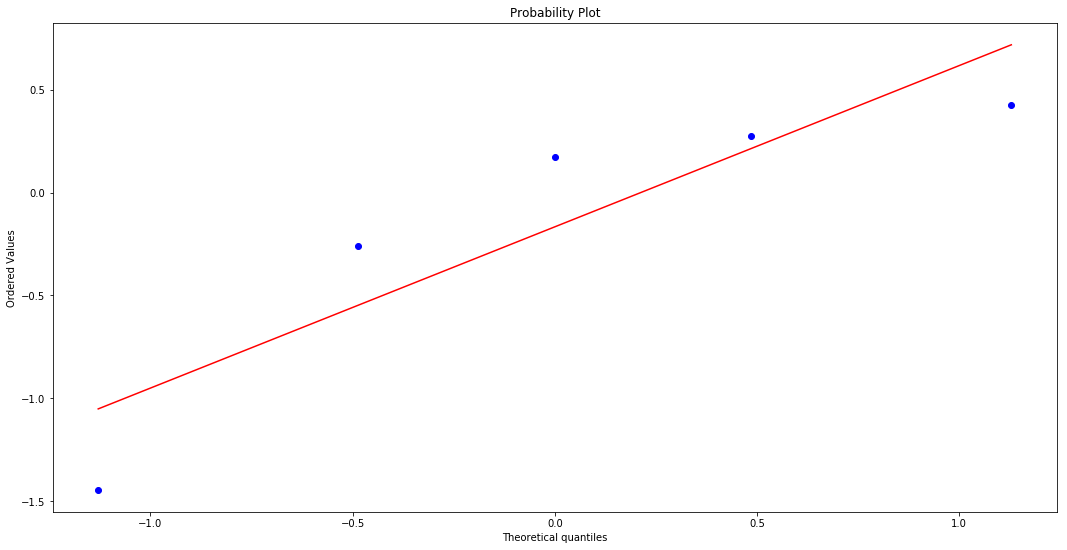

<Figure size 1296x648 with 0 Axes>

In [73]:
v.show_probplot('c1')

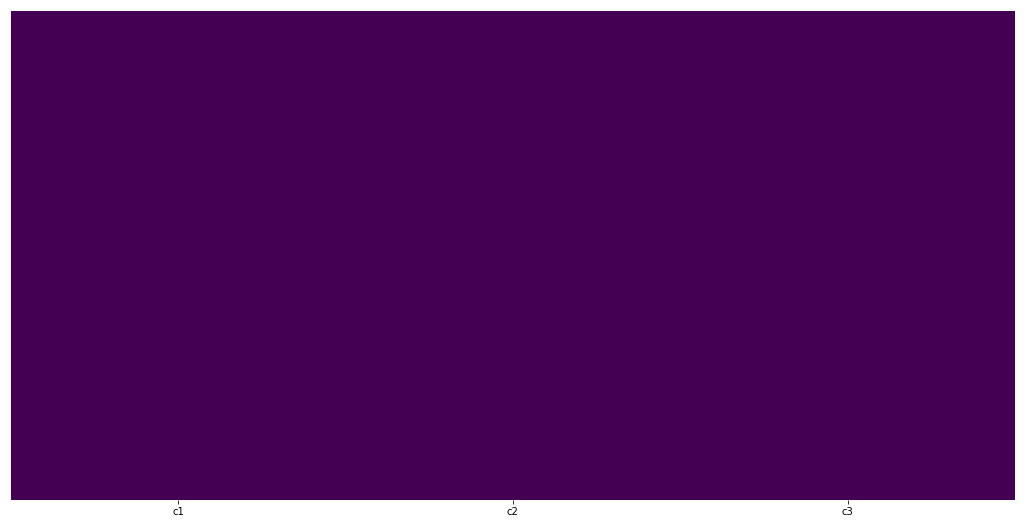

<Figure size 1296x648 with 0 Axes>

In [74]:
v.show_missing()